https://www.youtube.com/watch?v=H6du_pfuznE&list=PLZoTAELRMXVMdJ5sqbCK2LiM0HhQVWNzm&index=24&t=265s

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import tensorflow as tf

In [34]:
df = pd.read_csv('AAPL.csv')
df.head(3)

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.26,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.95,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.45,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 147.5+ KB


In [36]:
start_date = df['date'][0]
end_date = df['date'][1257]
print(f'start data: {start_date}, end date: {end_date}')

start data: 2015-05-27 00:00:00+00:00, end date: 2020-05-22 00:00:00+00:00


In [37]:
df_close = df.reset_index()['close']
df_close.head(3)

0    132.045
1    131.780
2    130.280
Name: close, dtype: float64

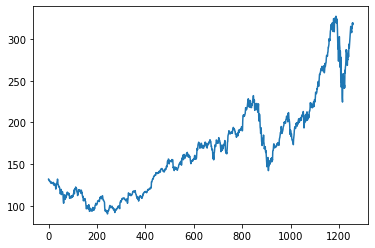

In [38]:
plt.plot(df_close)

In [39]:
scaler = MinMaxScaler()
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))
df_close

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [40]:
total_samples_cnt = df_close.shape[0]
training_sample_cnt = int(total_samples_cnt*0.75)

training_data = df_close[:training_sample_cnt, :]
testing_data = df_close[training_sample_cnt:, :]

In [41]:
print(training_data.shape[0])
print(testing_data.shape[0])

943
315


In [42]:
def transform_data(input_data):
    
    window_length = 100
    X = []
    y = []
    
    for idx in range(len(input_data) - window_length-1):
        
        upper_idx = idx+window_length
        X.append(input_data[idx:upper_idx, 0])
        y.append(input_data[upper_idx, 0])
        
    return np.array(X), np.array(y)

In [43]:
train_X, train_y = transform_data(training_data)
test_X, test_y = transform_data(testing_data)

In [44]:
assert train_X.shape[0] == train_y.shape[0]
assert test_X.shape[0] == test_y.shape[0]

In [45]:
train_X.shape

(842, 100)

In [46]:
train_X = train_X.reshape(-1, 100, 1)
test_X = test_X.reshape(-1, 100, 1)

In [47]:
train_X.shape

(842, 100, 1)

In [58]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(90, return_sequences=True, input_shape=(100, 1)),
    tf.keras.layers.LSTM(70, return_sequences=True),
    tf.keras.layers.LSTM(50, return_sequences=False),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')

In [59]:
early_stopping = tf.keras.callbacks.EarlyStopping(
     min_delta=0.001, 
     patience=5, 
     restore_best_weights=True,
 )

history = model.fit(train_X, train_y, epochs=50, validation_data=(test_X, test_y), callbacks=[early_stopping], batch_size=32)

Train on 842 samples, validate on 214 samples
Epoch 1/50
842/842 [==============================] - 23s 27ms/sample - loss: 0.0084 - val_loss: 0.0220
Epoch 2/50
842/842 [==============================] - 18s 21ms/sample - loss: 0.0013 - val_loss: 0.0119
Epoch 3/50
842/842 [==============================] - 18s 21ms/sample - loss: 9.1554e-04 - val_loss: 0.0052
Epoch 4/50
842/842 [==============================] - 18s 21ms/sample - loss: 8.3233e-04 - val_loss: 0.0053
Epoch 5/50
842/842 [==============================] - 17s 21ms/sample - loss: 7.2667e-04 - val_loss: 0.0066
Epoch 6/50
842/842 [==============================] - 17s 21ms/sample - loss: 6.5825e-04 - val_loss: 0.0039
Epoch 7/50
842/842 [==============================] - 17s 21ms/sample - loss: 5.8686e-04 - val_loss: 0.0033
Epoch 8/50
842/842 [==============================] - 17s 21ms/sample - loss: 6.4845e-04 - val_loss: 0.0036
Epoch 9/50
842/842 [==============================] - 17s 21ms/sample - loss: 8.1719e-04 - val_los

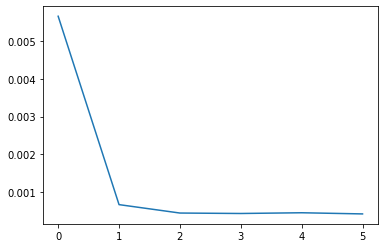

In [50]:
plt.plot(history.history['loss'])
plt.show()

In [51]:
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

In [52]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [56]:
train_error = math.sqrt(mean_squared_error(train_predict, train_y))
train_error

150.01270357543336

In [57]:
test_error = math.sqrt(mean_squared_error(test_predict, test_y))
test_error

245.77372954057708

In [69]:
testing_data.shape

(315, 1)

In [90]:
forecast_input = testing_data[215:].reshape(1, -1)

lstm_output_100 = []
for i in range(100):
    
    if i > 0:
        forecast_input = forecast_input[1:]
    
    model_input = forecast_input.reshape((1, 100, 1))
    
    pred_out = model.predict(model_input) 
    lstm_output_100.append(pred_out[0][0])
    forecast_input = np.append(forecast_input, pred_out[0][0])

print(lstm_output_100)

[0.9360714, 0.93980753, 0.94222003, 0.9434151, 0.94359064, 0.94296485, 0.94173735, 0.94007397, 0.938103, 0.93591946, 0.93359125, 0.9311659, 0.9286758, 0.9261445, 0.92358834, 0.92102057, 0.91845125, 0.91588986, 0.9133445, 0.9108224, 0.9083305, 0.9058746, 0.9034605, 0.90109277, 0.8987753, 0.8965115, 0.89430416, 0.89215547, 0.8900668, 0.88803935, 0.8860737, 0.88417023, 0.8823285, 0.8805484, 0.87882924, 0.87717026, 0.87557006, 0.87402785, 0.8725419, 0.8711113, 0.86973435, 0.8684093, 0.86713505, 0.86590946, 0.8647313, 0.86359906, 0.8625107, 0.86146486, 0.8604602, 0.8594948, 0.85856724, 0.85767627, 0.8568203, 0.85599786, 0.85520774, 0.8544485, 0.85371894, 0.8530179, 0.8523441, 0.8516964, 0.8510741, 0.8504755, 0.8499, 0.84934664, 0.84881425, 0.8483023, 0.8478097, 0.8473358, 0.84687966, 0.8464406, 0.8460181, 0.8456112, 0.8452195, 0.8448422, 0.84447885, 0.84412885, 0.8437914, 0.8434667, 0.8431535, 0.84285164, 0.84256065, 0.8422802, 0.8420097, 0.8417491, 0.8414975, 0.841255, 0.84102106, 0.840795

In [91]:
forecast_close = df.reset_index()['close'].values
lstm_output_100 = scaler.inverse_transform(np.array(lstm_output_100).reshape(-1, 1))
forecast_close = np.append(forecast_close, lstm_output_100)

(1358,)


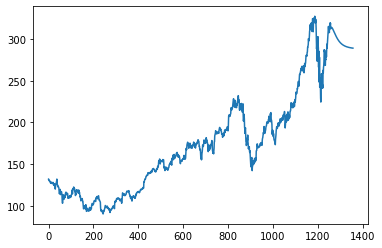

In [92]:
print(forecast_close.shape)
plt.plot(forecast_close)

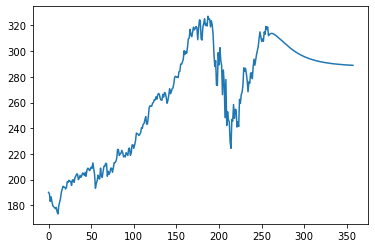

In [93]:
plt.plot(forecast_close[1000:])